<a href="https://colab.research.google.com/github/ba18406/Lab001/blob/master/answers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print (df)
print (data)
print(data.shape)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
(14,)


In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  new_array = np.random.choice(sample, (n_iterations, sample_size), replace = True)
  data_mean = np.mean(new_array)
  mean_array = np.array(new_array.mean(axis=1))
  lower = np.percentile(mean_array, 2.5)
  upper = np.percentile(mean_array, 97.5)
  return data_mean, lower, upper

(0, 100000)

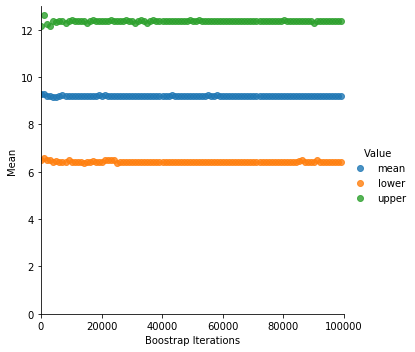

In [51]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df.values
print (df)
print (data)
print(data.shape)

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]
[[18. 24.]
 [15. 27.]
 [18. 27.]
 [16. 25.]
 [17. 31.]
 [15. 35.]
 [14. 24.]
 [14. 19.]
 [14. 28.]
 [15. 23.]
 [15. 27.]
 [14. 20.]
 [15. 22.]
 [14. 18.]
 [22. 20.]
 [18. 31.]
 [21. 32.]
 [21. 31.]
 [10. 32.]
 [10. 24.]
 [11. 26.]
 [ 9. 29.]
 [28. 24.]
 [25. 24.]
 [19. 33.]
 [16. 33.]
 [17. 32.]
 [19. 28.]
 [18. 19.]
 [14. 32.]
 [14. 34.]
 [14. 26.]
 [14. 30.]
 [12. 22.]
 [13. 22.]
 [13. 33.]
 [18. 39.]
 [22. 36.]
 [19. 28.]
 [18. 27.]
 [23. 21.]
 [26. 24.]
 [25. 30.]
 [20. 34.]
 [21. 32.]
 [13. 38.]
 [14. 37.]
 [15. 30.]
 [14. 31.]
 [17. 37.]
 [11. 32.]
 [13. 47.]
 [12. 41.]
 [13. 45.]
 [15. 34.]
 [13. 33.]


In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  new_array = np.random.choice(sample, (n_iterations, sample_size), replace = True)
  data_mean = np.mean(new_array)
  mean_array = np.array(new_array.mean(axis=1))
  lower = np.percentile(mean_array, 2.5)
  upper = np.percentile(mean_array, 97.5)
  return data_mean, lower, upper

(0, 100000)

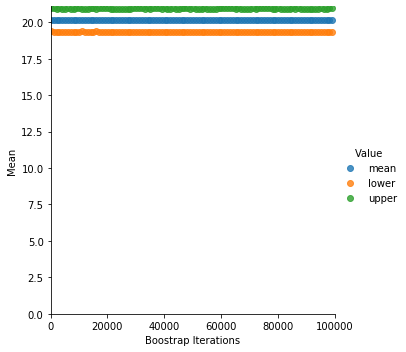

In [59]:
currentFleet = data.T[0]
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(currentFleet, currentFleet.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

(0, 100000)

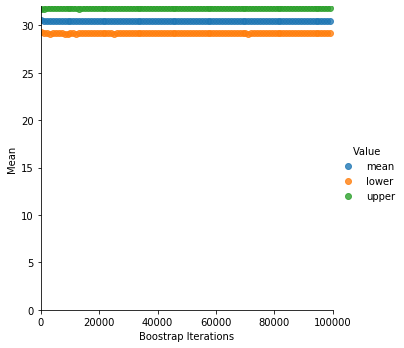

In [60]:
x = data.T[1][~np.isnan(data.T[1])]
FirstFleet = x
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(FirstFleet, FirstFleet.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')